In [6]:
%load_ext autoreload
%autoreload 2

from ml4a import mask
from ml4a import image
from ml4a.models import basnet
from ml4a.models import torch_dreams

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
model = torch_dreams.inception_v3(pretrained=True)
dreamer = torch_dreams.dreamer(model)

dreamer init on:  cuda


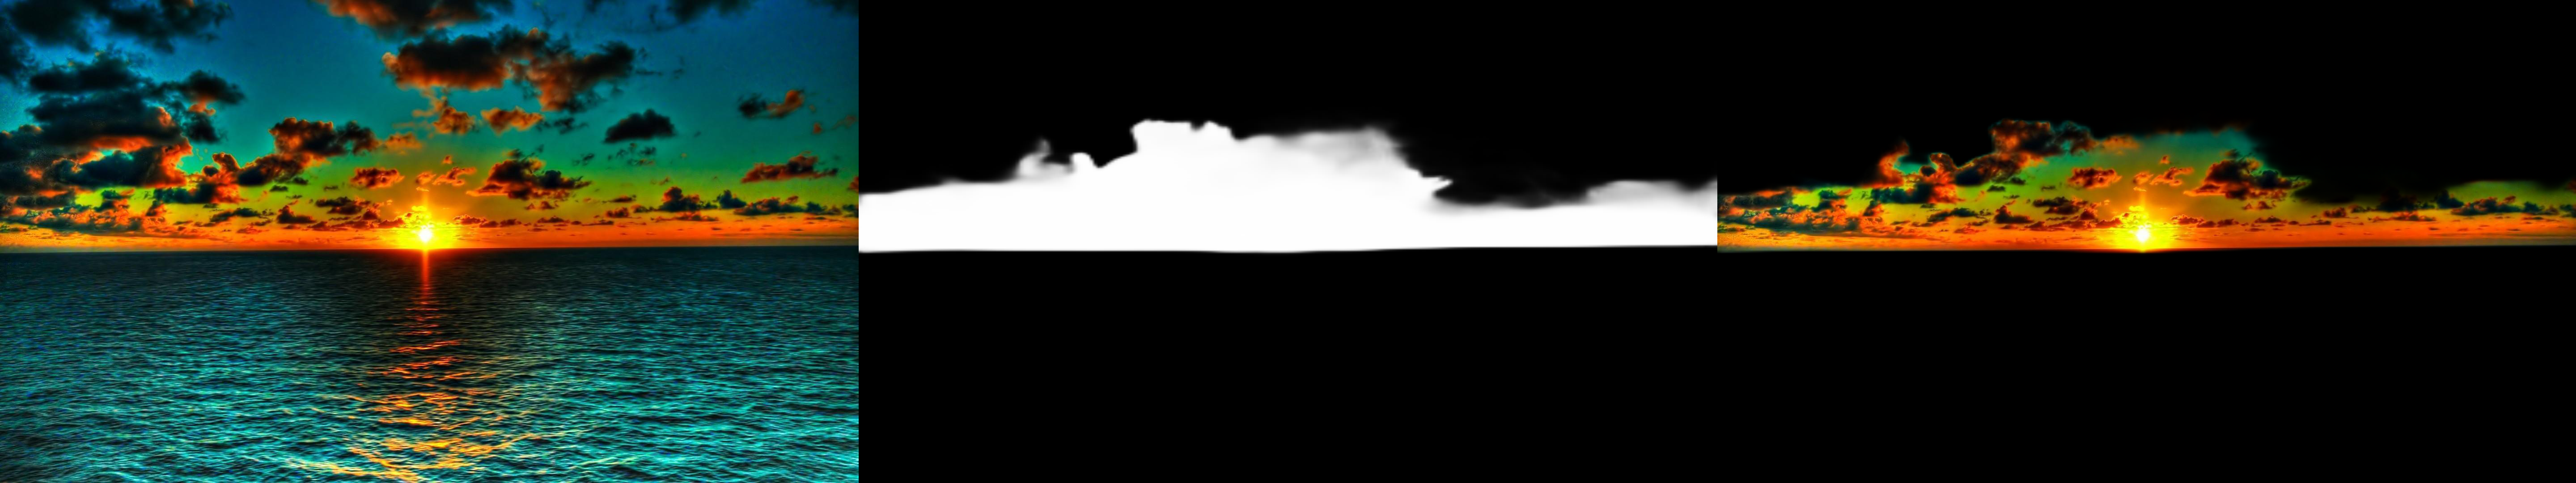

In [8]:
img = image.load_image('https://wallpaperaccess.com/full/1320173.jpg')

img_fg = basnet.get_foreground(img)
img_masked = mask.mask_image(img, img_fg)

all_images = image.concatenate_images([img, img_fg, img_masked])
image.display(all_images)

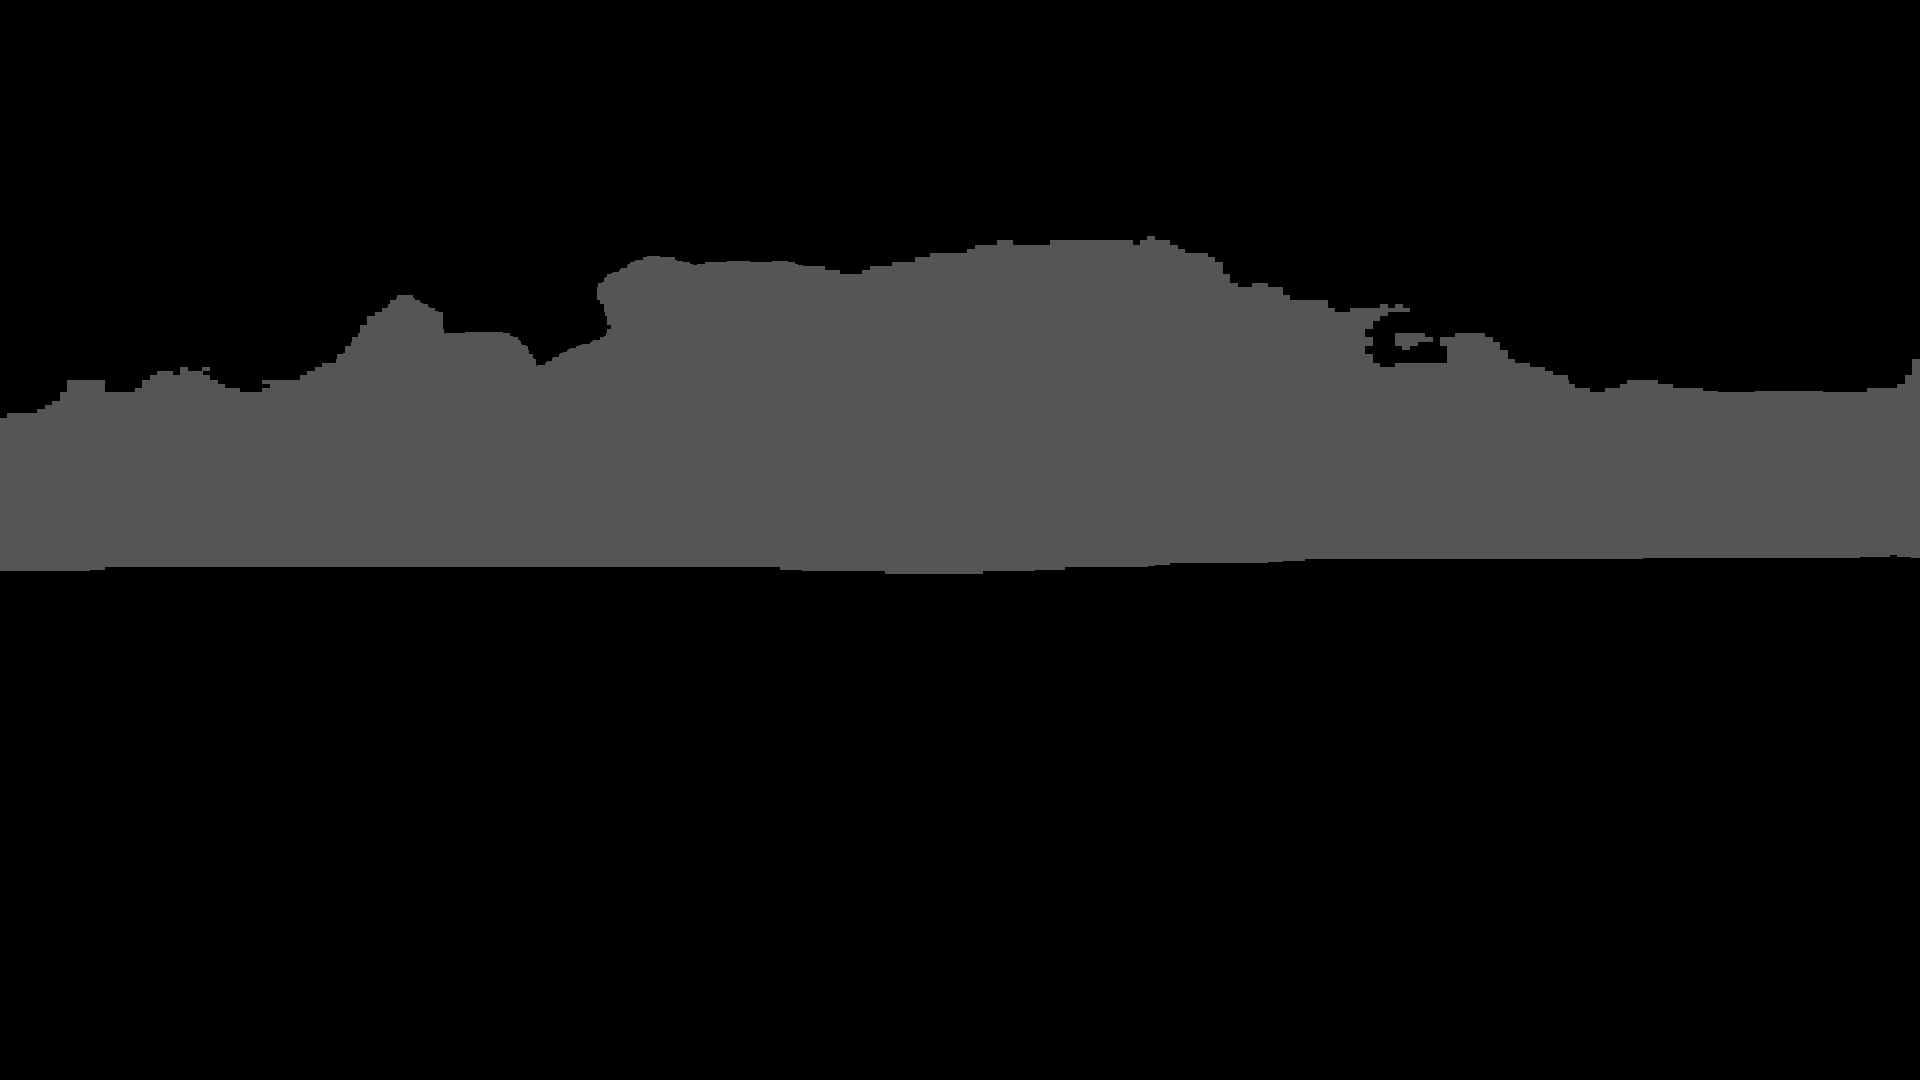

In [10]:
mask.view_mask(img_fg)

In [23]:

layers_to_use = [model.Conv2d_4a_3x3.conv, 
                 model.Mixed_6b.branch7x7dbl_2]

def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        if channel_number is not None:
            loss = layer_outputs[layer_number][channel_number].mean()
        else:
            loss = layer_outputs[layer_number].mean()

        return loss
    return custom_func


c1 = make_custom_func(0, 12)
c2 = make_custom_func(1, 88)



config = {
    "image_path": "horse.jpg",
    "layers": layers_to_use,
    "octave_scale": 1.1,
    "num_octaves": 15,
    "iterations": 30,
    "lr": 0.04,
    "max_rotation": 0.7,
    "grad_mask": [img_fg, (1-img_fg)*0.3],
    "custom_func": [c1, c2]
}


100%|██████████| 16/16 [00:21<00:00,  1.35s/it]


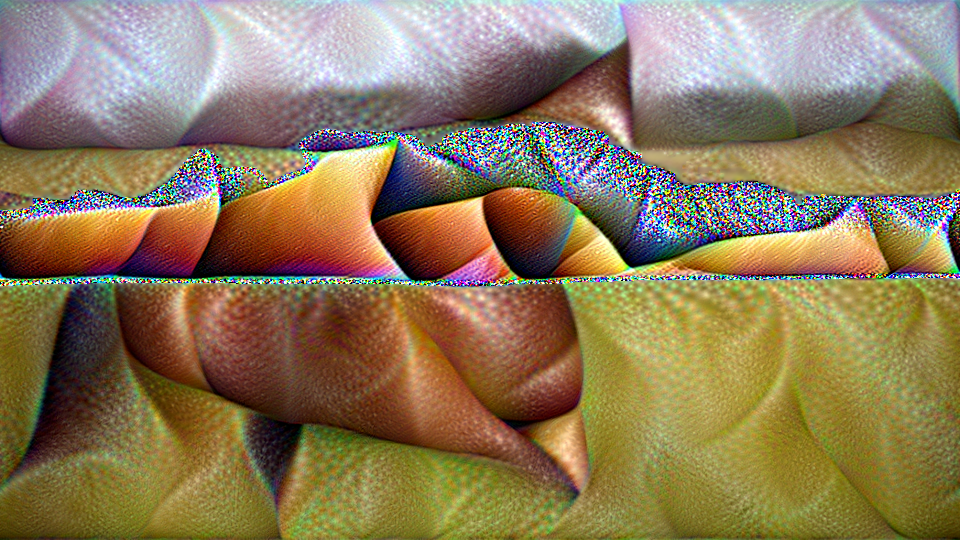

In [25]:
#plt.rcParams['figure.figsize'] = 15, 15
out = dreamer.deep_dream_with_masks(config)
image.display(np.clip(255*out, 0, 255))
# res = out*mask + np.array(img)*(1-mask)/255  ## replace non masked part with original 
#plt.imshow(out)
#plt.show()

In [164]:
out_p = cv2.cvtColor((out*255), cv2.COLOR_BGR2RGB)
cv2.imwrite("torch_dreams_ml4a.jpg", out_p)

True

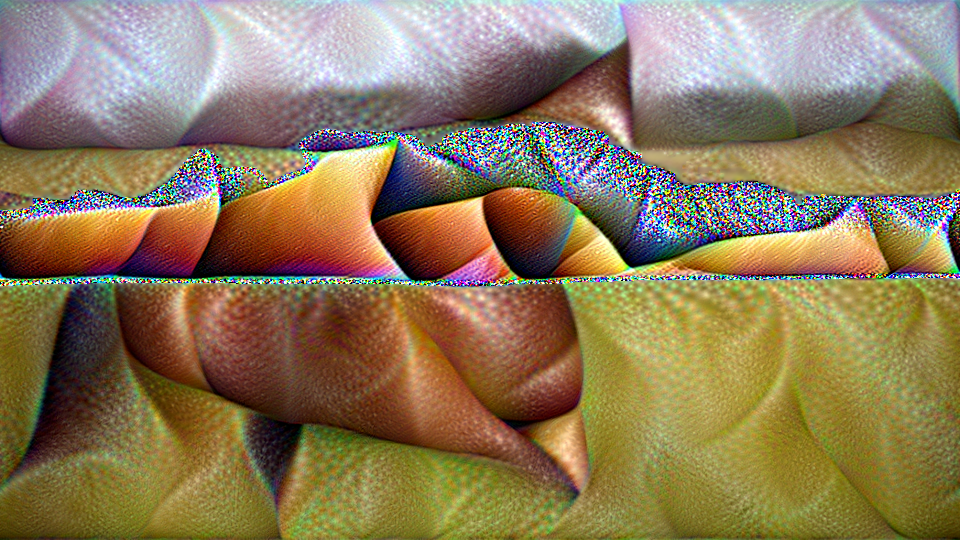

In [27]:
import numpy as np
image.display(np.clip(255*out, 0, 255))